# Indicator Exploration

*Justin R. Garrard*

### *Executive Summary*



### *Objectives*



### Setup

In [1]:
# Import libraries
import os 
import math
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from ipywidgets import * 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.cluster.hierarchy import dendrogram

In [2]:
# Declare global variables
DATA_DIR = os.path.join('../data/processed')
DATA_FILE = os.path.join(DATA_DIR, 'processed_features_labeled.csv')
plt.style.use('ggplot')

In [3]:
# Useful functions
def null_counter(df):
    record_nulls = []
    for col in df.columns:
        nulls = df[col].isnull().sum()
        percent_null = round((nulls / df.shape[0]) * 100, 2)
        record_nulls.append([col, nulls, percent_null])
    output = pd.DataFrame(record_nulls, columns=['Attribute', 'Null Count', '% Null'])
    return output

def get_year_range(df):
    year_range = list(df['year'].unique())
    year_range.sort()
    return year_range

def subset_by_states_only(df):
    df = df[df['fips'] <= 56]
    return df

def sound_off(df):
    nRow, nCol = cluster_df.shape
    print(f'There are {nRow} rows and {nCol} columns.')
    print('')

    YEAR_RANGE = get_year_range(cluster_df)
    print(f'Data spans the years {YEAR_RANGE[0]} to {YEAR_RANGE[-1]}.')
    print('')

    print('Available columns include:')
    display(null_counter(cluster_df))
    
def filter_out_factor(df, column_name):
    ## Identify records with null values in column
    bad_records = df[df[column_name].isnull()]
    bad_records.to_csv(f'missing_{column_name}.csv')

    ## Drop records with null values in column
    df = df[df[column_name].notnull()]
    return df

In [4]:
# Load and preview data
## Isolate by specific columns
cluster_df = pd.read_csv(DATA_FILE)

sound_off(cluster_df)

There are 111825 rows and 18 columns.

Data spans the years 2009 to 2016.

Available columns include:


,Attribute,Null Count,% Null
0,leaid,0,0.0
1,year,0,0.0
2,lea_name,0,0.0
3,fips,0,0.0
4,number_of_schools,0,0.0
5,teachers_total_fte,0,0.0
6,spec_ed_students,0,0.0
7,enrollment_x,0,0.0
8,read_test_pct_prof_midpt,0,0.0
9,math_test_pct_prof_midpt,0,0.0


In [10]:
subset = cluster_df[cluster_df['label'] == 4]
display(subset)

,leaid,year,lea_name,fips,number_of_schools,teachers_total_fte,spec_ed_students,enrollment_x,read_test_pct_prof_midpt,math_test_pct_prof_midpt,rev_total,exp_total,students_per_school,students_per_teacher,spending_per_student,academic_performance,special_ed_students_percent,label
1517,1300023,2013,STATE CHARTER SCHOOLS- ODYSSEY SCHOOL,13.0,1.0,319.00,1393.0,13300.0,94.0,66.0,57955000.0,63026000.0,13300.0,41.692790,4738.796992,80.00,9.547739,4
8534,3900079,2013,ELECTRONIC CLASSROOM OF TOMORROW,39.0,1.0,377.50,2759.0,12974.0,69.0,45.0,114686000.0,115454000.0,12974.0,34.368212,8898.874672,57.00,4.702428,4
8576,3900180,2013,OHIO VIRTUAL ACADEMY,39.0,1.0,307.00,1583.0,12920.0,80.0,62.0,95527000.0,92947000.0,12920.0,42.084691,7194.040248,71.00,8.161718,4
10170,4200071,2013,PENNSYLVANIA CYBER CS,42.0,1.0,226.75,1529.0,10389.0,63.0,49.0,124769000.0,114820000.0,10389.0,45.816979,11052.074309,56.00,6.794637,4
10202,4200119,2013,COMMONWEALTH CONNECTIONS ACADEMY CS,42.0,1.0,317.17,1391.0,8037.0,56.0,46.0,94988000.0,94783000.0,8037.0,25.339723,11793.330845,51.00,5.777858,4
10220,4200140,2013,AGORA CYBER CS,42.0,1.0,384.00,2188.0,9490.0,44.0,33.0,128809000.0,122692000.0,9490.0,24.713542,12928.556375,38.50,4.337294,4
15470,1300232,2015,State Charter Schools- Georgia Cyber Academy,13.0,1.0,348.00,1745.0,13916.0,36.0,25.0,75958000.0,75954000.0,13916.0,39.988506,5458.033918,30.50,7.974785,4
23170,3900079,2015,Electronic Classroom Of Tomorrow,39.0,1.0,445.50,2797.0,14153.0,29.0,17.0,122123000.0,125767000.0,14153.0,31.768799,8886.243199,23.00,5.060064,4
23194,3900180,2015,Ohio Virtual Academy,39.0,1.0,223.00,1342.0,9466.0,49.0,40.0,79508000.0,79050000.0,9466.0,42.448430,8350.940207,44.50,7.053651,4
24757,4200071,2015,Pennsylvania Cyber CS,42.0,1.0,325.00,1671.0,9058.0,47.0,24.0,127293000.0,128091000.0,9058.0,27.870769,14141.201148,35.50,5.420706,4


In [15]:
subset = cluster_df[cluster_df['fips'] == 16]
display(subset)

,leaid,year,lea_name,fips,number_of_schools,teachers_total_fte,spec_ed_students,enrollment_x,read_test_pct_prof_midpt,math_test_pct_prof_midpt,rev_total,exp_total,students_per_school,students_per_teacher,spending_per_student,academic_performance,special_ed_students_percent,label
1708,1600001,2013,WEST BONNER COUNTY DISTRICT,16.0,5.0,73.68,169.0,1257.0,90.0,69.5,11128000.0,10821000.0,251.400000,17.060261,8608.591885,79.75,7.437870,9
1709,1600002,2013,LAKE PEND OREILLE DISTRICT,16.0,12.0,212.30,394.0,4242.0,64.5,54.5,33154000.0,33778000.0,353.500000,19.981159,7962.753418,59.50,10.766497,13
1710,1600004,2013,IDAHO VIRTUAL ACADEMY,16.0,2.0,64.38,276.0,3438.0,84.5,64.5,15033000.0,15036000.0,1719.000000,53.401678,4373.472949,74.50,12.456522,8
1711,1600005,2013,RICHARD MCKENNA CHARTER HIGH SCHOOL,16.0,2.0,16.95,4.0,409.0,90.0,69.5,1839000.0,1597000.0,204.500000,24.129794,3904.645477,79.75,102.250000,5
1712,1600006,2013,ROLLING HILLS CHARTER SCHOOL,16.0,1.0,13.25,30.0,260.0,75.0,75.0,2108000.0,1968000.0,260.000000,19.622642,7569.230769,75.00,8.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100192,1603330,2012,WEISER DISTRICT,16.0,6.0,80.58,141.0,1570.0,92.0,85.0,10874000.0,10904000.0,261.666667,19.483743,6945.222930,88.50,11.134752,9
100193,1603360,2012,WENDELL DISTRICT,16.0,4.0,63.09,128.0,1153.0,82.0,70.0,7787000.0,7679000.0,288.250000,18.275479,6660.017346,76.00,9.007812,9
100194,1603400,2012,WEST JEFFERSON DISTRICT,16.0,4.0,35.64,41.0,611.0,88.0,81.0,4980000.0,4569000.0,152.750000,17.143659,7477.905074,84.50,14.902439,9
100195,1603420,2012,WEST SIDE JOINT DISTRICT,16.0,3.0,33.43,40.0,632.0,92.0,90.0,4212000.0,4243000.0,210.666667,18.905175,6713.607595,91.00,15.800000,5


In [5]:
# Remove the columns that won't be used as features
cluster_prepared_df = cluster_df.drop(['leaid', 'year', 'lea_name', 'fips'], axis=1)

### Regression

In [22]:
# Normalize data
features = cluster_prepared_df.drop(['academic_performance', 'read_test_pct_prof_midpt', 'math_test_pct_prof_midpt'], axis=1)
labels = cluster_prepared_df['academic_performance']

normed_features = preprocessing.StandardScaler().fit_transform(features)
normed_labels = preprocessing.StandardScaler().fit_transform(labels.to_numpy().reshape(-1,1))

# Setup a Linear Regression
lr_model = LinearRegression()

# Fit the regression with the available data
lr_model.fit(normed_features, normed_labels)
preds = lr_model.predict(normed_features)

# Visualize the resulting model
r_2 = round(lr_model.score(normed_features, normed_labels), 3)
print(f'R^2 Value: {r_2}')
print()

mse = round(mean_squared_error(normed_labels, preds), 3)
print(f'MSE: {mse}')
print()

coef_vals = [round(x,3) for x in lr_model.coef_[0]]
coef_map = list(zip(features.columns, coef_vals))
print(f'Coefficients:')
pprint.pprint(coef_map)
print()

print(f'Intercept: {lr_model.intercept_}')

# Use statsmodels to get more details
display(sm.OLS(normed_labels, normed_features).fit().summary())

R^2 Value: 0.015

MSE: 0.985

Coefficients:
[('number_of_schools', -0.113),
 ('teachers_total_fte', 0.269),
 ('spec_ed_students', -0.33),
 ('enrollment_x', 0.223),
 ('rev_total', 0.025),
 ('exp_total', -0.077),
 ('students_per_school', 0.047),
 ('students_per_teacher', -0.024),
 ('spending_per_student', -0.032),
 ('special_ed_students_percent', 0.037)]

Intercept: [8.42783003e-17]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.015
Method:                 Least Squares   F-statistic:                              175.1
Date:                Thu, 15 Apr 2021   Prob (F-statistic):                        0.00
Time:                        08:04:05   Log-Likelihood:                     -1.5780e+05
No. Observations:              111825   AIC:                                  3.156e+05
Df Residuals:                  111815   BIC:                                  3.157e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1133      0.015     -7.322      0.000      -0.144      -0.083
x2             0.2687      0.016     17.302      0.000       0.238       0.299
x3            -0.3300      0.017    -19.463      0.000      -0.363      -0.297
x4             0.2226      0.022      9.982      0.000       0.179       0.266
x5             0.0248      0.036      0.680      0.496      -0.047       0.096
x6            -0.0771      0.037     -2.071      0.038      -0.150      -0.004
x7             0.0469      0.003     14.570      0.000       0.041       0.053
x8            -0.0236      0.003     -7.915      0.000      -0.029      -0.018
x9            -0.0317      0.003    -10.631      0.000      -0.038      -0.026
x10            0.0372      0.003     12.454      0.000       0.031       0.043
==============================================================================
Omnibus:                     6112.499   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5003.563
Skew:                          -0.439   Prob(JB):                         0.00
Kurtosis:                       2.449   Cond. No.                         41.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modeling

In [6]:
# Build an elbow chart to find a good cluster range
def build_elbow_chart(df, min_clusters=2, max_clusters=10, random_seed=777):
    ## Calculate sum of squared distances for each cluster
    ssd = []
    for k in range(min_clusters, max_clusters+1):
        kmeans_learner = KMeans(n_clusters=k, random_state=random_seed)
        kmeans_learner.fit(df)
        ssd.append(kmeans_learner.inertia_)

    ## Plot sum of squared distances
    plt.plot(range(min_clusters, max_clusters+1), ssd)
    plt.title('Elbow Chart')
    plt.xlabel('K')
    plt.ylabel('Sum of Squared Distances')
    
    
# Build a good cluster and view the resulting data
def build_cluster(df, k=6, random_seed=777):
    kmeans_learner = KMeans(n_clusters=k, random_state=random_seed)
    results = kmeans_learner.fit_predict(df)
    return results


# View the characteristics of each labeled dataset
def view_cluster(df, results, k=6, verbose=True):
    df['labels'] = results
    for i in range(0, k):
        subset = df[df['labels'] == i]
#         subset.to_csv(f'labeled_{i}.csv')
        if verbose:
            print(i)
            display(subset.describe())
            print()

In [7]:
# Place data into four categories, to prevent clustering from emphasizing size
single_df = cluster_prepared_df[cluster_prepared_df['number_of_schools'] == 1]

small_df = cluster_prepared_df[(cluster_prepared_df['number_of_schools'] > 1) & 
                               (cluster_prepared_df['number_of_schools'] <= 3)]

medium_df = cluster_prepared_df[(cluster_prepared_df['number_of_schools'] > 3) & 
                               (cluster_prepared_df['number_of_schools'] <= 10)]

large_df = cluster_prepared_df[(cluster_prepared_df['number_of_schools'] > 10)]

df_list = [single_df, small_df, medium_df, large_df]
counts = [x['number_of_schools'].count() for x in df_list]
print(counts)

[24462, 36603, 37571, 13189]


In [8]:
# Normalize within clusters to detect patterns besides size
normed_df_list = []
for df in df_list:
        normed_df_list.append(preprocessing.StandardScaler().fit_transform(df))

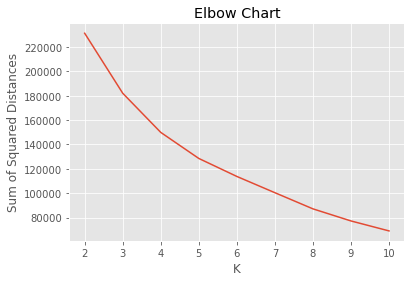

In [9]:
build_elbow_chart(normed_df_list[0])

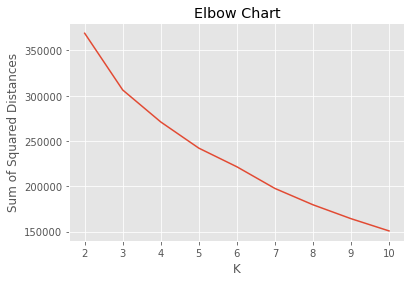

In [10]:
build_elbow_chart(normed_df_list[1])

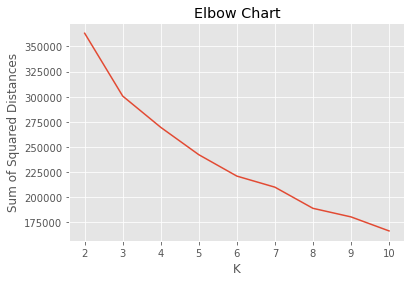

In [11]:
build_elbow_chart(normed_df_list[2])

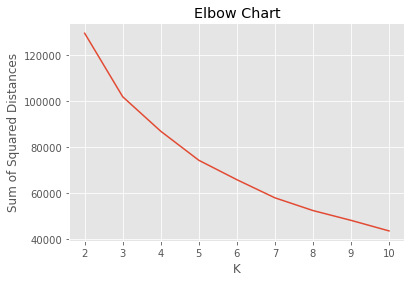

In [12]:
build_elbow_chart(normed_df_list[3])

In [13]:
results = []
for df in normed_df_list:
    results.append(build_cluster(df, k=4))

---
Analysis (Category)
---

In [14]:
# Box Plot

# Interactive Box Plot for Indicators
%matplotlib notebook

metrics = list(cluster_prepared_df.columns)
category = [0, 1, 2, 3]
category_mapping = {0: "Single", 1: "Small", 2: "Medium", 3: "Large"}

@interact(metric=metrics)
def cat_box_metric_explorer(metric):
    # Clear any old figures
    plt.close()
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(6, 4), num='Boxplot Explorer Tool')
    
    plot_data = [category_df[metric] for category_df in df_list]

    plt.boxplot(plot_data)
    plt.title(f'Category: {metric}')
    
interactive_plot = interactive(cat_box_metric_explorer,
                               metric=metrics[0])

interactive(children=(Dropdown(description='metric', options=('number_of_schools', 'teachers_total_fte', 'spec…

---
Analysis (Sub-Category)
---

In [15]:
# Box Plot

# Interactive Box Plot for Indicators
%matplotlib notebook

metrics = list(cluster_prepared_df.columns)
category = [0, 1, 2, 3]
category_mapping = {0: "Single", 1: "Small", 2: "Medium", 3: "Large"}

@interact(metric=metrics, cat=category)
def box_metric_explorer(metric, cat):
    # Clear any old figures
    plt.close()
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(6, 4), num='Boxplot Explorer Tool')
    
    # Select category data
    cluster_count = len(np.unique(results[cat]))
    category_df = df_list[cat]
    view_cluster(category_df, results[cat], k=cluster_count)
    
    # Subset sub-categories
    sub_categories = [category_df[category_df['labels'] == i] for i in range(0,cluster_count)]
    
    # Subset metric
    plot_data = [sub_df[metric] for sub_df in sub_categories]

    plt.boxplot(plot_data)
    plt.title(f'{category_mapping[cat]} Category: {metric}')
    
interactive_plot = interactive(box_metric_explorer,
                               metric=metrics[0],
                               cat=category[0])

interactive(children=(Dropdown(description='metric', options=('number_of_schools', 'teachers_total_fte', 'spec…

### Sub-Category Regressions


In [16]:
# For a given category,
# Show the regressions for each sub-category contained within,
# Using non-normalized data

single_df


,number_of_schools,teachers_total_fte,spec_ed_students,enrollment_x,read_test_pct_prof_midpt,math_test_pct_prof_midpt,rev_total,exp_total,students_per_school,students_per_teacher,spending_per_student,academic_performance,special_ed_students_percent,labels
138,1.0,27.10,37.0,320.0,32.0,37.0,9808000.0,9877000.0,320.0,11.808118,30865.625000,34.5,8.648649,2
157,1.0,11.80,12.0,104.0,82.0,72.0,3405000.0,3523000.0,104.0,8.813559,33875.000000,77.0,8.666667,0
159,1.0,14.40,34.0,141.0,77.0,67.0,4413000.0,4317000.0,141.0,9.791667,30617.021277,72.0,4.147059,0
172,1.0,14.00,19.0,211.0,72.0,67.0,6232000.0,5849000.0,211.0,15.071429,27720.379147,69.5,11.105263,0
173,1.0,9.15,7.0,107.0,95.0,95.0,2809000.0,2888000.0,107.0,11.693989,26990.654206,95.0,15.285714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111767,1.0,69.37,157.0,1101.0,44.0,47.0,19287000.0,16995000.0,1101.0,15.871414,15435.967302,45.5,7.012739,1
111774,1.0,37.65,45.0,511.0,36.0,43.0,7000000.0,6257000.0,511.0,13.572377,12244.618395,39.5,11.355556,2
111776,1.0,32.16,36.0,465.0,43.0,56.0,5239000.0,5285000.0,465.0,14.458955,11365.591398,49.5,12.916667,2
111806,1.0,17.86,11.0,117.0,82.0,82.0,4485000.0,4192000.0,117.0,6.550952,35829.059829,82.0,10.636364,0


In [17]:
# Regressions

# Interactive Regressions for Indicators
%matplotlib notebook

metrics = list(cluster_prepared_df.columns)
category = [0, 1, 2, 3]
category_mapping = {0: "Single", 1: "Small", 2: "Medium", 3: "Large"}


@interact(metric=metrics, cat=category)
def multi_regression_metric_explorer(metric, cat):
    # Clear any old figures
    plt.close()
    
    # Select category data
    cluster_count = len(np.unique(results[cat]))
    category_df = df_list[cat]
    view_cluster(category_df, results[cat], k=cluster_count, verbose=False)
    
    # Subset sub-categories
    sub_categories = [category_df[category_df['labels'] == i] for i in range(0,cluster_count)]
    
    # Subset metric
#     plot_data = [sub_df for sub_df in sub_categories]

#     Normalize data
#     normed_features = preprocessing.StandardScaler().fit_transform(features)
#     normed_labels = preprocessing.StandardScaler().fit_transform(labels.to_numpy().reshape(-1,1))
    
    # Display regression results for each subcategory 
    print(f'{category_mapping[cat]}')
    
    for i in range(0, cluster_count):
        features = sub_categories[i].drop([metric, 'labels'], axis=1)
        labels = sub_categories[i][metric]
        
        # Setup a Linear Regression
        lr_model = LinearRegression()

        # Fit the regression with the available data
        lr_model.fit(features, labels)
        preds = lr_model.predict(features)

        # Visualize the resulting model
        display(sm.OLS(labels, features).fit().summary())
    
interactive_plot = interactive(multi_regression_metric_explorer,
                               metric=metrics[0],
                               cat=category[0])

interactive(children=(Dropdown(description='metric', options=('number_of_schools', 'teachers_total_fte', 'spec…

In [18]:
# Regenerate the input dataset, but with labels
def reconstitute_data(df_list, results_list):
    # Map results to dataframe
    for i in range(0, len(df_list)):
        offset = (4 * i) + 1
        df_list[i]['results'] = results_list[i] + offset

    # Merge dataframes
    output = pd.concat(df_list)
    return output

In [19]:
x = reconstitute_data(df_list, results)

<ipython-input-18-8c733833db4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['results'] = results_list[i] + offset


In [20]:
x.describe()

,number_of_schools,teachers_total_fte,spec_ed_students,enrollment_x,read_test_pct_prof_midpt,math_test_pct_prof_midpt,rev_total,exp_total,students_per_school,students_per_teacher,spending_per_student,academic_performance,special_ed_students_percent,labels,results
count,111825.000000,111825.000000,111825.000000,111825.000000,111825.000000,111825.000000,1.118250e+05,1.118250e+05,111825.000000,111825.000000,1.118250e+05,111825.000000,111825.000000,24462.000000,111825.00000
mean,6.435243,205.574188,426.090874,3294.745638,63.454536,58.851218,4.167220e+07,4.162563e+07,390.658006,14.925368,1.497708e+04,61.152877,8.582439,0.928338,7.54080
std,17.480246,670.811722,1435.297106,11665.702722,19.951430,22.296790,1.460922e+08,1.479640e+08,328.793250,23.566119,4.069322e+04,20.439996,9.823979,0.975171,3.91085
min,1.000000,0.090000,1.000000,4.000000,0.500000,0.500000,2.600000e+04,1.600000e+04,2.000000,0.035545,1.467890e+02,0.500000,0.195402,0.000000,1.00000
25%,2.000000,28.820000,49.000000,377.000000,49.500000,42.000000,4.893000e+06,4.794000e+06,198.750000,12.042735,9.964520e+03,46.500000,6.000000,0.000000,5.00000
50%,3.000000,70.340000,136.000000,1002.000000,67.000000,62.000000,1.300000e+07,1.279200e+07,351.500000,14.253261,1.206513e+04,63.500000,7.409938,0.000000,8.00000
75%,6.000000,176.240000,375.000000,2752.000000,79.000000,77.000000,3.581700e+07,3.534900e+07,518.666667,16.694444,1.610256e+04,78.000000,9.401961,2.000000,10.00000
max,1026.000000,31315.940000,85751.000000,670746.000000,99.500000,99.500000,1.057872e+10,9.824700e+09,14319.000000,6752.000000,6.541375e+06,99.500000,1826.000000,3.000000,16.00000


In [21]:
# Check post-processed dataset

# DATA_DIR = os.path.join('../data/processed')
# DATA_FILE = os.path.join(DATA_DIR, 'processed_features_labeled.csv')
# cluster_df = pd.read_csv(DATA_FILE)
# sound_off(cluster_df)